# Predição de Propensão de Compra 
Objetivo do projeto é analisar os dados dos clientes e prever clientes 
com potencial de compra futura. 

### Passos da Análise 
- Identificar a taxa de compra, variável sendo 0 não comprou e 1 comprou. 
- Identificar a correlação da compra com as demais variáveis, usando gráficos e 
a correlação de pearson. 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns


In [2]:
df = pd.read_excel('ECommerce.xlsx')
df.head()

,CustomerID,Buy,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,5,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,Credit Card,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,0,NaN,Phone,1,30.0,Credit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Credit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,Credit Card,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [3]:
df.shape

(5630, 20)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Buy                          5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [5]:
df.nunique().sort_values()

Buy                               2
Complain                          2
Gender                            2
PreferredLoginDevice              3
CityTier                          3
MaritalStatus                     3
SatisfactionScore                 5
NumberOfDeviceRegistered          6
PreferedOrderCat                  6
HourSpendOnApp                    6
PreferredPaymentMode              7
NumberOfAddress                  15
OrderAmountHikeFromlastYear      16
OrderCount                       16
CouponUsed                       17
DaySinceLastOrder                22
WarehouseToHome                  34
Tenure                           36
CashbackAmount                 2586
CustomerID                     5630
dtype: int64

In [6]:
df.isna().sum()

CustomerID                       0
Buy                              0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [7]:
df = df.drop(['CustomerID'], axis=1)

In [8]:
df['OrderCount'] = df['OrderCount'].fillna(df['OrderCount'].mean())
df['Tenure'] = df['Tenure'].fillna(df['Tenure'].mean())
df['WarehouseToHome'] = df['WarehouseToHome'].fillna(df['WarehouseToHome'].mean())
df['HourSpendOnApp'] = df['HourSpendOnApp'].fillna(df['HourSpendOnApp'].mean())
df['OrderAmountHikeFromlastYear'] = df['OrderAmountHikeFromlastYear'].fillna(df['OrderAmountHikeFromlastYear'].mean())
df['CouponUsed'] = df['CouponUsed'].fillna(df['CouponUsed'].mean())
df['DaySinceLastOrder'] = df['DaySinceLastOrder'].fillna(df['DaySinceLastOrder'].mean())


In [9]:
df['Tenure'] = df['Tenure'].astype(int)

In [10]:
df.describe().round().T

,count,mean,std,min,25%,50%,75%,max
Buy,5630.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
Tenure,5630.0,10.0,8.0,0.0,3.0,9.0,15.0,61.0
CityTier,5630.0,2.0,1.0,1.0,1.0,1.0,3.0,3.0
WarehouseToHome,5630.0,16.0,8.0,5.0,9.0,14.0,20.0,127.0
HourSpendOnApp,5630.0,3.0,1.0,0.0,2.0,3.0,3.0,5.0
NumberOfDeviceRegistered,5630.0,4.0,1.0,1.0,3.0,4.0,4.0,6.0
SatisfactionScore,5630.0,3.0,1.0,1.0,2.0,3.0,4.0,5.0
NumberOfAddress,5630.0,4.0,3.0,1.0,2.0,3.0,6.0,22.0
Complain,5630.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
OrderAmountHikeFromlastYear,5630.0,16.0,4.0,11.0,13.0,15.0,18.0,26.0


## Análise dos Dados Usando Gráficos 

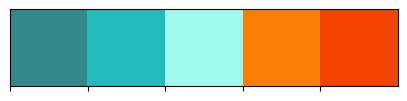

In [11]:
color_palette = ['#348888', '#22BABB', '#9EF8EE', '#FA7F08', '#F24405']
sns.set_palette(sns.color_palette(color_palette))
sns.palplot(sns.color_palette(color_palette))
plt.style.use('ggplot')

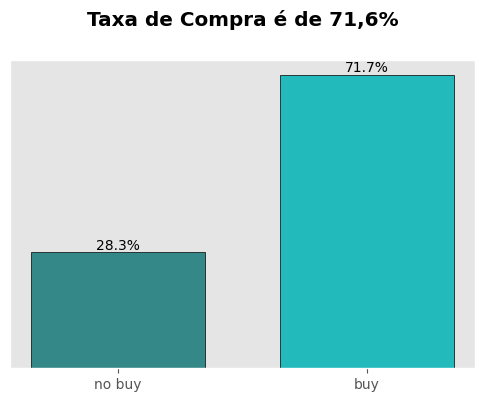

In [12]:
fig, ax = plt.subplots(figsize=(6, 4))

default_grouped = df.groupby(['Buy'])[['Buy']].count().rename(columns={'Buy': 'count'}).reset_index()
default_grouped['pct'] = default_grouped['count'] / default_grouped['count'].sum() * 100

Grafbars = ax.bar(x=default_grouped['Buy'], height=default_grouped['pct'], 
                  color=color_palette, edgecolor = 'black', width=0.7)
for bar, pct in zip(Grafbars, default_grouped['pct']):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height, f'{pct:.1f}%', ha='center', va='bottom')
ax.set_title('Taxa de Compra é de 71,6%', pad=25, fontweight='bold')
ax.set_xticks(ticks=default_grouped['Buy'], labels=['no buy', 'buy'])
ax.yaxis.set_visible(False)
ax.grid(False)

### Interpretação do Gráfico 
- Podemos ver que 71,6% (4035) dos clientes realizaram uma compra no último mês. 
- Enquanto 28,3% (1595) dos clientes não realizaram uma compra no último mês. 

<Axes: ylabel='CashbackAmount'>

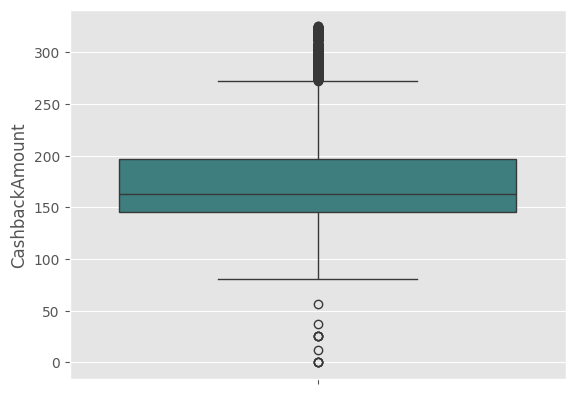

In [13]:
# Distribuição dos valores de Cashback 
sns.boxplot(y = df['CashbackAmount'], color="#348888")

## Interpretação do Gráfico
- Podemos perceber que no primeiro quartil, 25% dos dados de cashbak estão abaixo
de $150, ou seja, cerca de 25% dos clientes pediram um cashback menor que $150;
- O valor da mediana está com 50% dos clientes que pediram um cashbak menor 
e maior que $160 ;
- No terceiro quartil, com 75% dos clientes pediram um cashback menor que $200; 
- Nas duas extremidades, vemos os outliers. Clientes que pediram valores menores
que $50 e maiores que %270 mais ou menos. 

<Axes: ylabel='Tenure'>

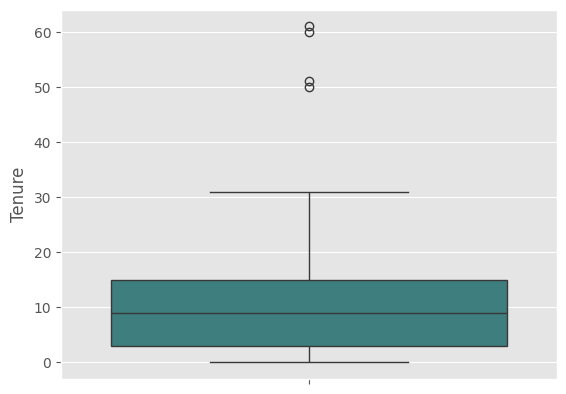

In [14]:
# Distribuição dos valores de Tenure (tempo)
sns.boxplot(y = df['Tenure'], color="#348888")

### Interpretação do Gráfico 
- No primeiro quartil 25% dos dados de tempo estão abaixo de 3 meses. 
- A mediana está com 50% dos dados de tempo abaixo de 9 meses. 
- O terceiro quartil está com 75% dos dados de tempo abaixo de 15 meses. 
- Alguns outliers estão marcando valores acima de 50 meses. 

<Axes: ylabel='HourSpendOnApp'>

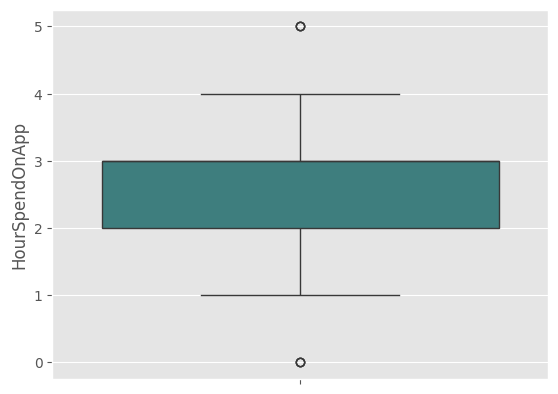

In [15]:
# Distribuição dos dados sobre horas passadas no app
sns.boxplot(y = df['HourSpendOnApp'], color="#348888")

### Interpretação dos Dados 
- No primeiro quartil vemos que 25% dos clientes estão passando menos que 
2 horas no app. 
- No terceiro quartil 75% dos clientes estão passando menos de 3 hoas no app. 
- Alguns dados estão em outlier, sendo eles valor menor que 1 hora e valor
maior de 5 horas. 

<Axes: ylabel='DaySinceLastOrder'>

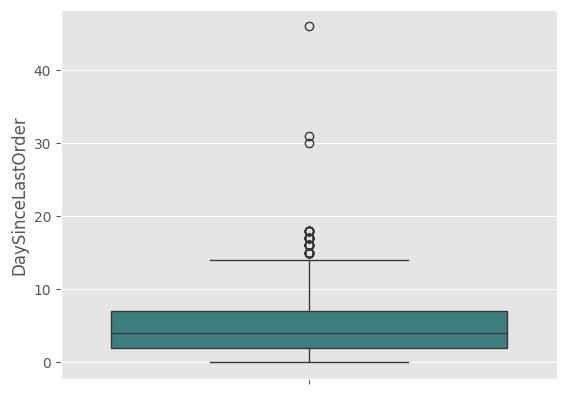

In [16]:
# Distribuição de dias desde o último pedido do cliente
sns.boxplot(y = df['DaySinceLastOrder'], color="#348888")

### Interpretação do Gráfico
- No primeiro quartil 25% dos clientes realizaram uma compra nos ultimos 2 dias. 
- A mediana mostra que 50% dos clientes realizaram uma compra nos ultimos 4 dias.
- No terceiro quartil 75% dos clientes realizaram uma compra nos ultimos 7 dias. 
- Alguns outliers estão estre os valores correspondentes entre 15 e 40 dias. 

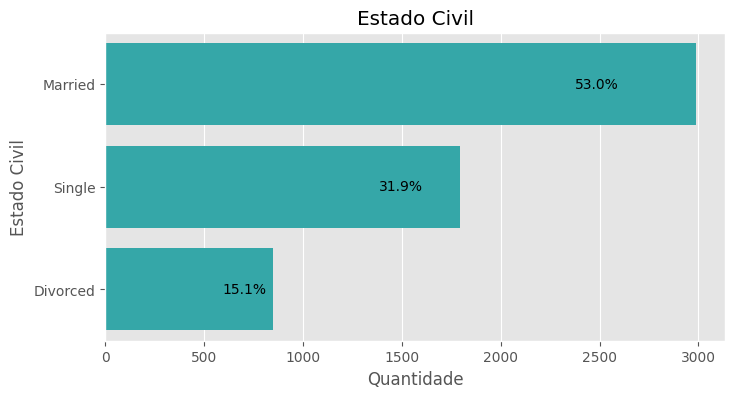

In [17]:
# Quantidade de pessoas e seus status de estado civil
quant = df['MaritalStatus'].value_counts().reset_index()
quant.columns = ['MaritalStatus', 'quantidade']


fig, ax = plt.subplots(figsize=(8,4))
plot = sns.barplot(quant, x='quantidade',y='MaritalStatus', color='#22BABB', legend=False)
for p in ax.patches:
    width = p.get_width()
    plot.text(width/1.20, 
            p.get_y() + p.get_height() / 2,
            f'{width / quant["quantidade"].sum() * 100:.1f}%',  # Porcentagem com uma casa decimal
            ha='center', va='center', color = 'black')

plt.xlabel('Quantidade')
plt.ylabel('Estado Civil')
plt.title('Estado Civil')
plt.show()

### Interpretação do Gráfico 
- Os dados dos clientes estão com cerca de 53% (2986) dos clientes casados. 
- Os dados dos clientes estão com cerca de 31% (1796) dos clientes solteiros. 
- Os dados dos clientes estão com cerca de 15% (848) dos clientes divorciados. 

In [18]:
round(df['PreferredLoginDevice'].value_counts(normalize=True)*100,2)

PreferredLoginDevice
Mobile Phone    49.11
Computer        29.02
Phone           21.87
Name: proportion, dtype: float64

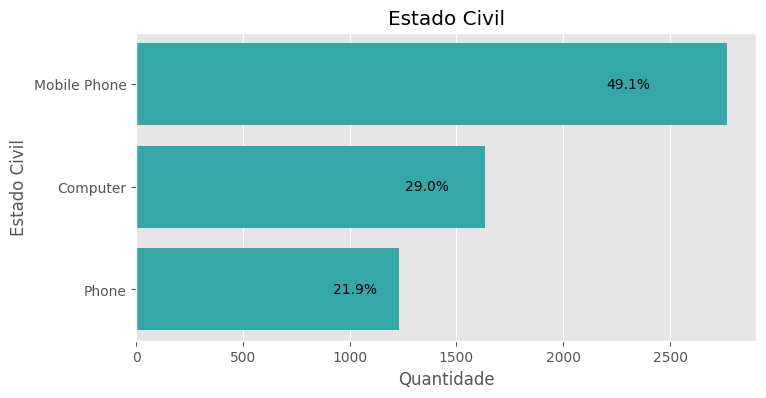

In [19]:
quant = df['PreferredLoginDevice'].value_counts().reset_index()
quant.columns = ['PreferredLoginDevice', 'quantidade']


fig, ax = plt.subplots(figsize=(8,4))
plot = sns.barplot(quant, x='quantidade',y='PreferredLoginDevice', color='#22BABB', legend=False)
for p in ax.patches:
    width = p.get_width()
    plot.text(width/1.20, 
            p.get_y() + p.get_height() / 2,
            f'{width / quant["quantidade"].sum() * 100:.1f}%',  # Porcentagem com uma casa decimal
            ha='center', va='center', color = 'black')

plt.xlabel('Quantidade')
plt.ylabel('Estado Civil')
plt.title('Estado Civil')
plt.show()

## Análise Exploratória Bivariada 


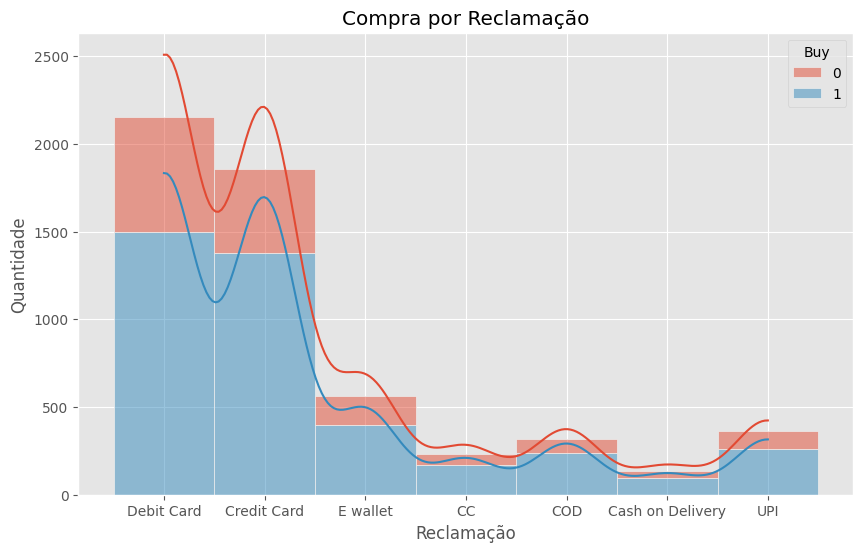

In [20]:
fig, ax = plt.subplots(figsize=(10,6))
sns.histplot (data =  df, x = 'PreferredPaymentMode', hue = 'Buy', multiple = "stack", kde=True, color=color_palette)
plt.xlabel('Reclamação')
plt.ylabel('Quantidade')
plt.title('Compra por Reclamação')
plt.show()

In [21]:
compras = df[df['Buy'] > 0]
pagamentos = compras['PreferredPaymentMode'].value_counts().reset_index()
pagamentos.columns = ['PreferredPaymentMode', 'Quantidade']

pagamentos['Proporcao'] = pagamentos['Quantidade'] / pagamentos['Quantidade'].sum()

display(pagamentos)


,PreferredPaymentMode,Quantidade,Proporcao
0,Debit Card,1498,0.371252
1,Credit Card,1380,0.342007
2,E wallet,396,0.098141
3,UPI,259,0.064188
4,COD,238,0.058984
5,CC,167,0.041388
6,Cash on Delivery,97,0.024040


### Interpretação do Gráfico 
- Podemos ver que a maior quantidade dos clientes utilizam cartões de crédito e 
de débito. 
- Com 3% dos clientes utilizaram cartão de débito e 3% utilizaram cartão de crédito.  

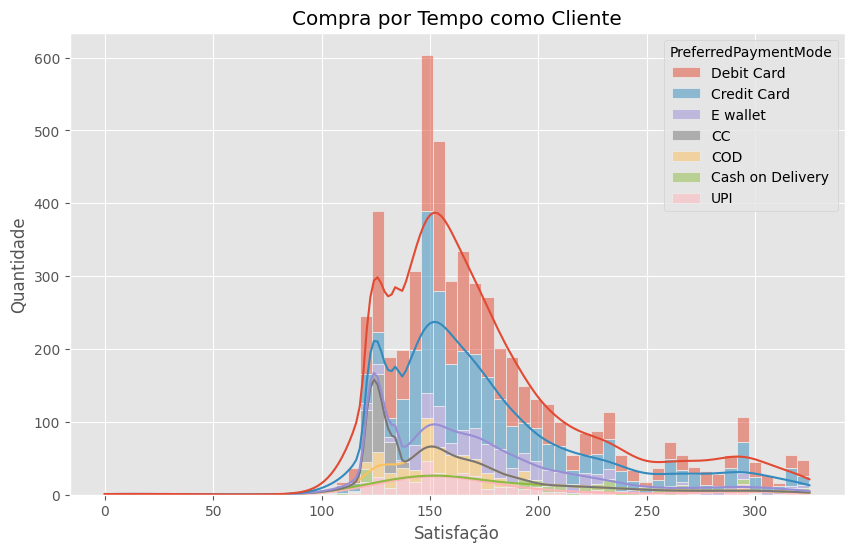

In [22]:
fig, ax = plt.subplots(figsize=(10,6))
sns.histplot (data =  df, x = 'CashbackAmount', hue = 'PreferredPaymentMode', 
              multiple = "stack", kde=True, color=color_palette)
plt.xlabel('Satisfação')
plt.ylabel('Quantidade')
plt.title('Compra por Tempo como Cliente')
plt.show()

### Interpretação do Gráfico 
- A maior quantidade de clientes que usaram cartão de débito receberam cashback 
de $150. Esses mesmos clientes receberam também outras quantidades de cashback. 
- Os clientes que usaram cartão de crédito também foram os que mais receberam cashback.
Tendo um pouco menos de $150 com os mais recebido. 

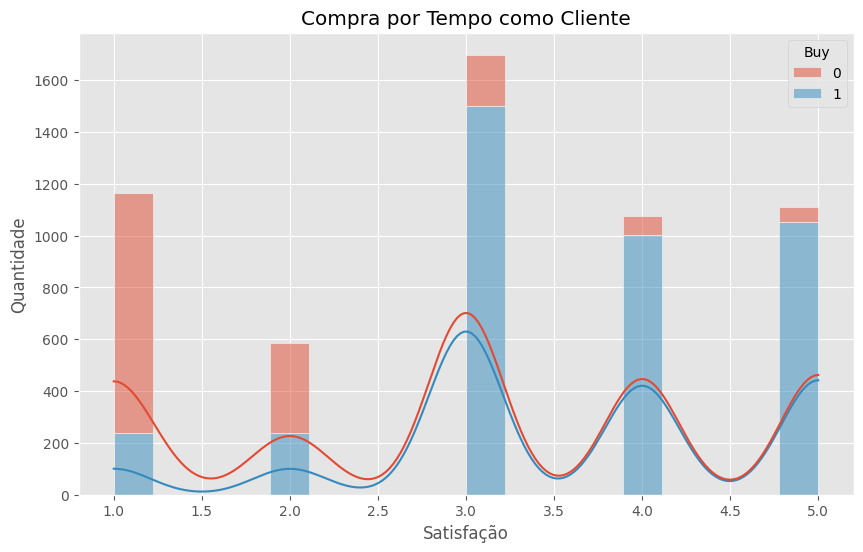

In [23]:
fig, ax = plt.subplots(figsize=(10,6))
sns.histplot (data =  df, x = 'SatisfactionScore', hue = 'Buy', 
              multiple = "stack", kde=True, color=color_palette)
plt.xlabel('Satisfação')
plt.ylabel('Quantidade')
plt.title('Compra por Tempo como Cliente')
plt.show()

In [24]:
correl = df['SatisfactionScore'].corr(df['Buy'], method='pearson')
print(f'Coeficiente de Correlação de Pearson: {correl}')

Coeficiente de Correlação de Pearson: 0.6058434814355574


- A correlação dos dados é modera positiva, com 0.6%.
- Há uma correlação significativa entre as compras com o ponto de satisfação.

### Interpretação do Gráfico 
- Podemos observar que os clientes que realizaram uma compra são aqueles mais satisfeitos.

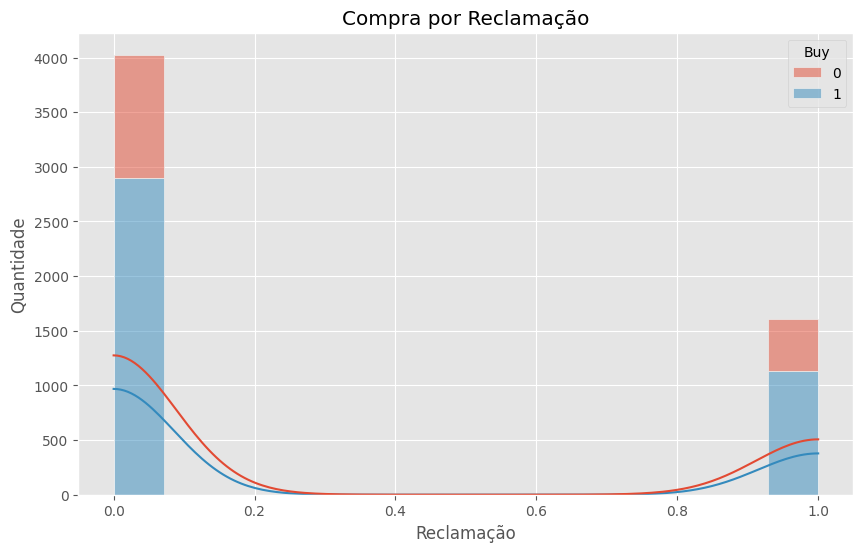

In [25]:
fig, ax = plt.subplots(figsize=(10,6))
sns.histplot (data =  df, x = 'Complain', hue = 'Buy', multiple = "stack", kde=True, color=color_palette)
plt.xlabel('Reclamação')
plt.ylabel('Quantidade')
plt.title('Compra por Reclamação')
plt.show()

In [26]:
correl = df['Complain'].corr(df['Buy'], method='pearson')
print(f'Coeficiente de Correlação de Pearson: {correl}')

Coeficiente de Correlação de Pearson: -0.014480152702828514


- A correlação dos dados dados é baixa positiva, com 0,01%. 
- Não há uma correlação significativa das compras com as reclamações. 

In [27]:
round(df['Complain'].value_counts(normalize=True)*100,2)

Complain
0    71.51
1    28.49
Name: proportion, dtype: float64

### Interpretação do Gráfico 
- Os dados mostram que houveram 28% dos clientes que fizeram uma reclamação. 
- Entre os dados de reclamação um pouco mais de 1000 clientes realizaram uma compra. 
E um pouco mais de 1500 não realizaram uma compra. 
- 2000 (71%) clientes realizaram uma compra e não fizeram uma reclamação. 

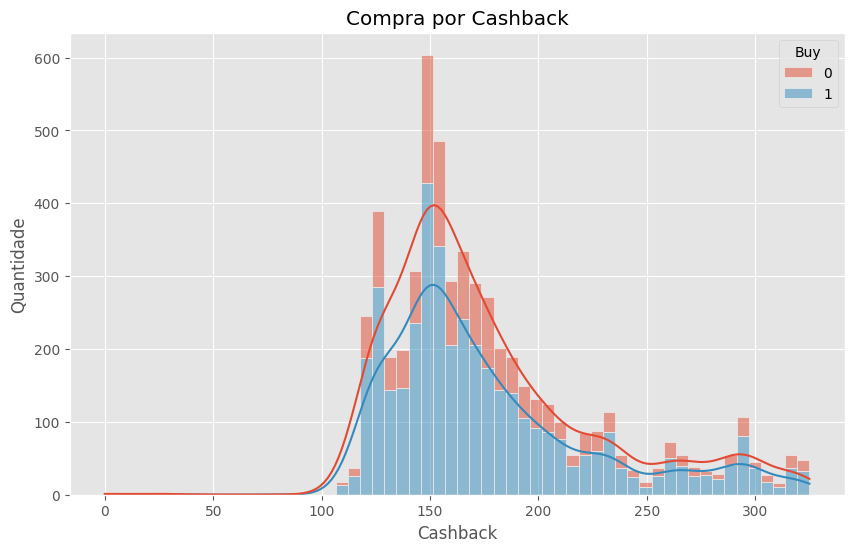

In [28]:
fig, ax = plt.subplots(figsize=(10,6))
sns.histplot (data =  df, x = 'CashbackAmount', hue = 'Buy', multiple = "stack",
              kde=True, color=color_palette)
plt.xlabel('Cashback')
plt.ylabel('Quantidade')
plt.title('Compra por Cashback')
plt.show()

In [29]:
correl = df['CashbackAmount'].corr(df['Buy'], method='pearson')
print(f'Coeficiente de Correlação de Pearson: {correl}')

Coeficiente de Correlação de Pearson: -0.01009099331357281


- A correlação dos dados está baixa negativa, com -0,01%. 
- Não há uma correlação com as compras e os cashback. 

### Interpretação do Gráfico 
- As maiores compras foram realizadas com os clientes que obtiveram $150 de cashback. 
Do mesmo modo em que mesmo recebendo o valor, não realizaram a compra. 
- Os dados mostram que com o decorrer do aumento cashback, menor a quantidade de 
clientes que realizaram uma compra no ultimo mês. 

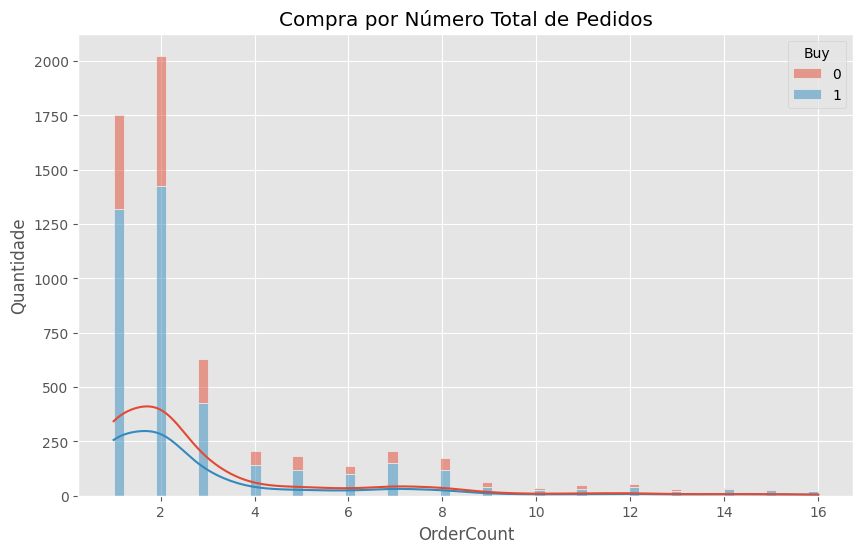

In [30]:
fig, ax = plt.subplots(figsize=(10,6))
sns.histplot (data =  df, x = 'OrderCount', hue = 'Buy', multiple = "stack", kde=True, color=color_palette)
plt.xlabel('OrderCount')
plt.ylabel('Quantidade')
plt.title('Compra por Número Total de Pedidos')
plt.show()

In [31]:
correl = df['OrderCount'].corr(df['Buy'], method='pearson')
print(f'Coeficiente de Correlação de Pearson: {correl}')

Coeficiente de Correlação de Pearson: -0.004235148851740496


- A correlação dos dados está baixa e positiva, com -0,004%. 
- Os dados mostram que a correlação ente as compras e o pedidos. 

### Interpretação do Gráfico 
-  O maior número de dados de compras foram daqueles clientes que realizaram 
um e dois pedidos. 

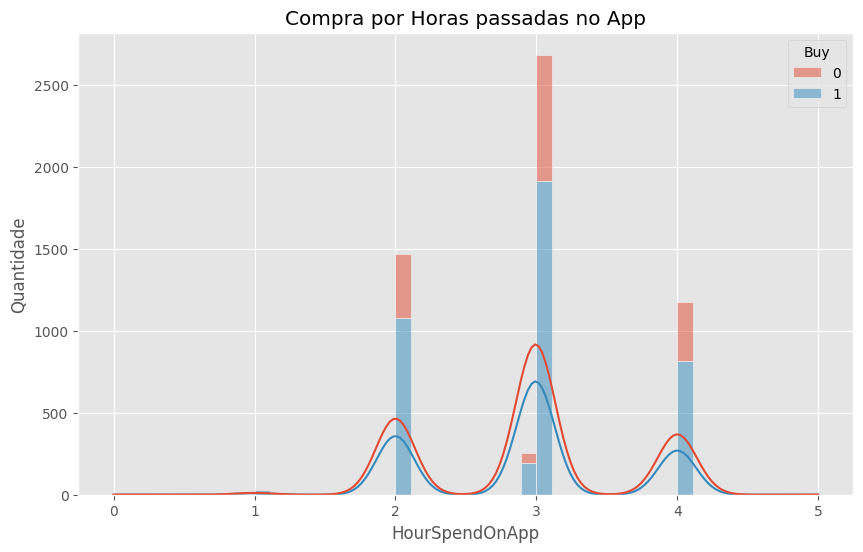

In [32]:
fig, ax = plt.subplots(figsize=(10,6))
sns.histplot (data =  df, x = 'HourSpendOnApp', hue = 'Buy', multiple = "stack", kde=True, color=color_palette)
plt.xlabel('HourSpendOnApp')
plt.ylabel('Quantidade')
plt.title('Compra por Horas passadas no App')
plt.show()

In [33]:
correl = df['HourSpendOnApp'].corr(df['Buy'], method='pearson')
print(f'Coeficiente de Correlação de Pearson: {correl}')

Coeficiente de Correlação de Pearson: -0.03242869444681843


### Interpretação do Gráfico
- 

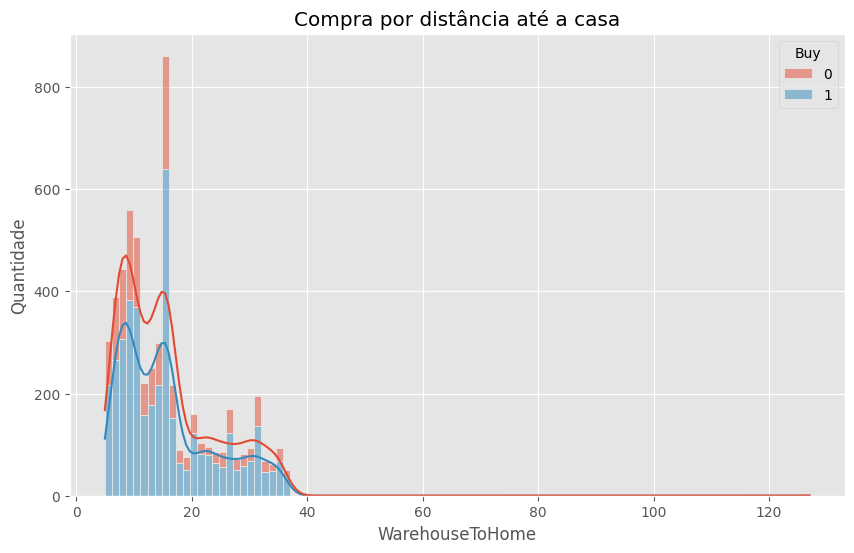

In [34]:
fig, ax = plt.subplots(figsize=(10,6))
sns.histplot (data =  df, x = 'WarehouseToHome', hue = 'Buy',
               multiple = "stack", kde=True, color=color_palette)
plt.xlabel('WarehouseToHome')
plt.ylabel('Quantidade')
plt.title('Compra por distância até a casa')
plt.show()

In [35]:
correl = df['WarehouseToHome'].corr(df['Buy'], method='pearson')
print(f'Coeficiente de Correlação de Pearson: {correl}')

Coeficiente de Correlação de Pearson: 0.01138540274245272


### Interpretação do Gráfico 
- 

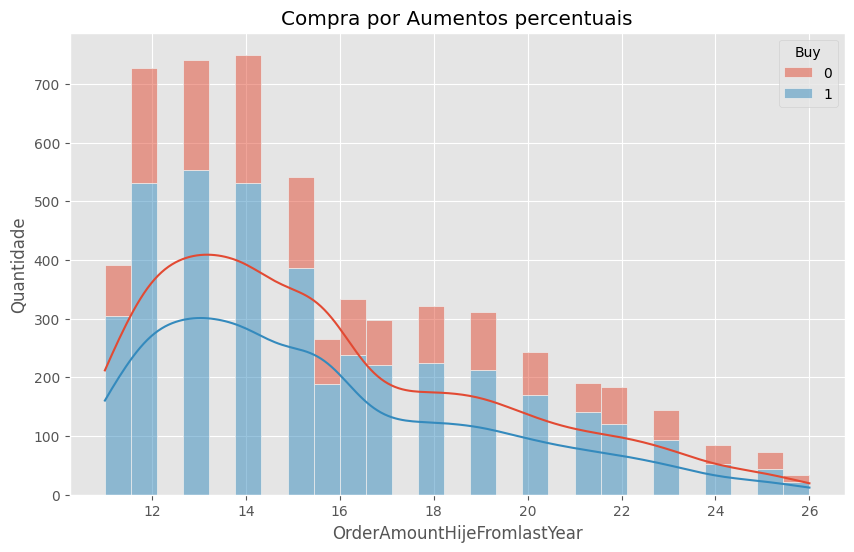

In [36]:
fig, ax = plt.subplots(figsize=(10,6))
sns.histplot (data =  df, x = 'OrderAmountHikeFromlastYear', hue = 'Buy',
              multiple = "stack", kde=True, color=color_palette)
plt.xlabel('OrderAmountHijeFromlastYear')
plt.ylabel('Quantidade')
plt.title('Compra por Aumentos percentuais')
plt.show()

In [37]:
correl = df['OrderAmountHikeFromlastYear'].corr(df['Buy'], method='pearson')
print(f'Coeficiente de Correlação de Pearson: {correl}')

Coeficiente de Correlação de Pearson: -0.058965476533289485


### Interpretação do Gráfico 
- 
